In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\Priyanshu Chauhan\\Downloads\\NewspaperData.csv")
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [3]:
#Select relevant columns

In [4]:
df = df[['daily','sunday']]
df

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [5]:
#Correlation analysis

<Axes: xlabel='daily', ylabel='sunday'>

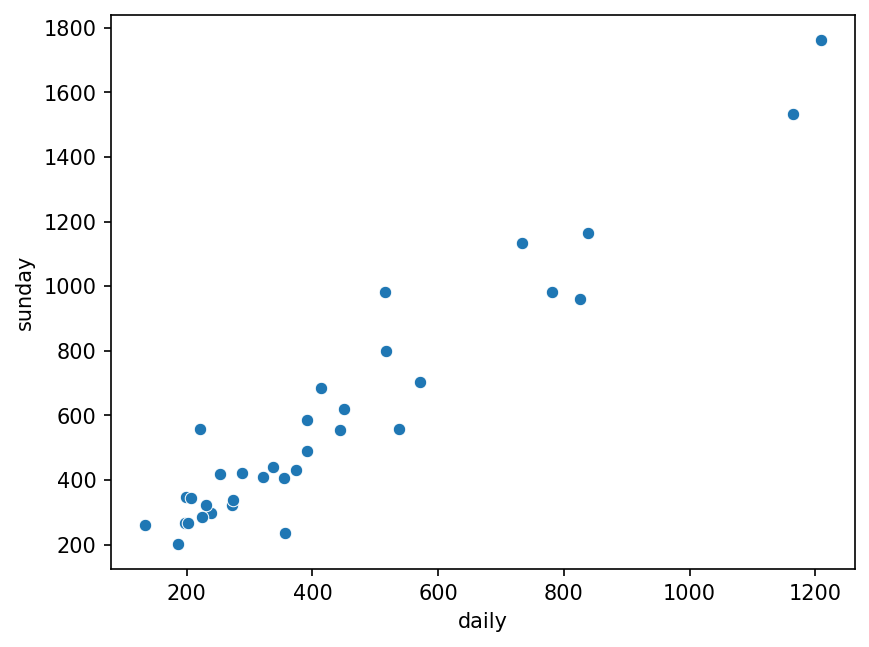

In [6]:
sns.scatterplot(x = df['daily'],y = df['sunday'])

<Axes: >

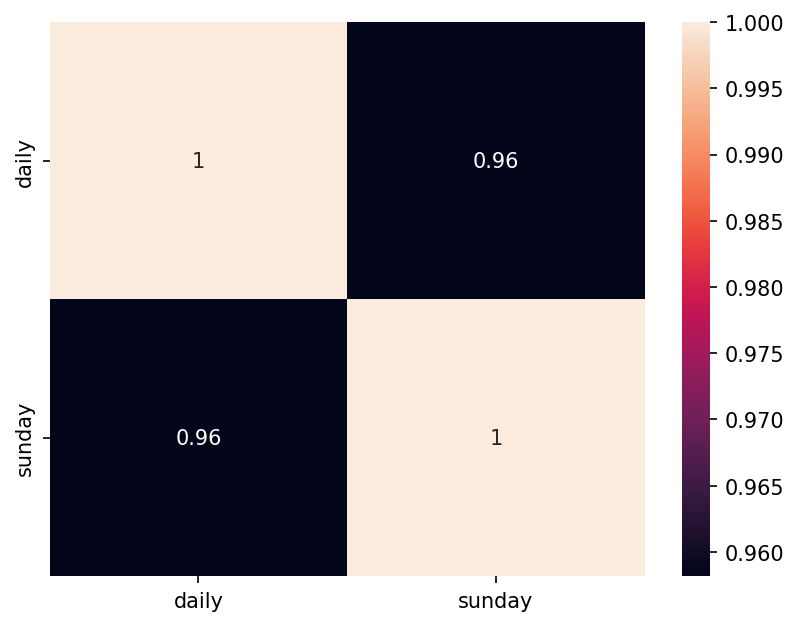

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
#Import statsmodels

In [9]:
import statsmodels.formula.api as smf

In [10]:
model = smf.ols('sunday~daily',data=df).fit()
model

In [11]:
#Model parameters
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [12]:
#line equation
daily_sales = 365

sunday_sales = 1.33*daily_sales+13.83
sunday_sales

499.28000000000003

In [13]:
#Print p value
model.pvalues

Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64

In [14]:
#r2 value
model.rsquared, model.rsquared_adj

(0.9180596895873294, 0.9154990548869335)

# Prediction for new data

In [15]:
df.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [16]:
test = pd.DataFrame({
    'daily' : [100,152,850,654,759]
})
test

,daily
0,100
1,152
2,850
3,654
4,759


In [17]:
model.predict(test)

0     147.807106
1     217.472273
2    1152.593174
3     890.009081
4    1030.679131
dtype: float64

# In class activity

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/WC_AT.csv')
df

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [19]:
test = pd.DataFrame({
    'Waist' : [40,45,75,95,200]
})
test

,Waist
0,40
1,45
2,75
3,95
4,200


In [20]:
model = smf.ols('AT~Waist',data=df).fit()
model

In [21]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [22]:
model.pvalues

Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64

In [23]:
model.rsquared, model.rsquared_adj

(0.6700368930528429, 0.6669531256981966)

In [24]:
model.predict(test) # mean results

0    -77.627112
1    -60.332815
2     43.432966
3    112.610154
4    475.790390
dtype: float64

# Data Transformation
- Sqrt
- Log

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/NewspaperData.csv')
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [26]:
# Distribution of the data
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


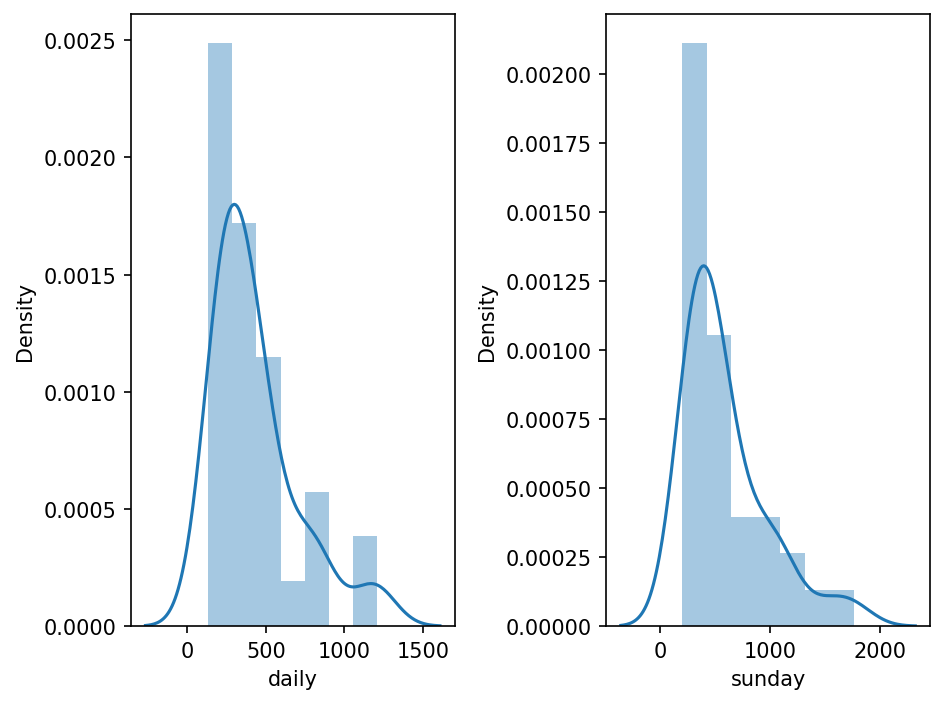

In [27]:
plt.subplot(1,2,1)
sns.distplot(df['daily'])

plt.subplot(1,2,2)
sns.distplot(df['sunday'])

plt.tight_layout()

In [28]:
df['daily'].skew()

1.5321591323040094

In [29]:
df['sunday'].skew()

1.5644730738925112

# Log Transformation

In [30]:
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [31]:
np.log(df['daily'])

0     5.971139
1     6.248006
2     5.873885
3     5.474600
4     6.287450
5     6.598202
6     5.292460
7     5.531902
8     5.328866
9     5.443184
10    6.108703
11    5.664941
12    5.224326
13    7.059951
14    6.097132
15    6.023135
16    5.606831
17    6.661594
18    7.097735
19    6.716004
20    5.410520
21    5.871675
22    6.245182
23    5.395739
24    5.822075
25    5.283813
26    4.892145
27    5.924280
28    5.612559
29    6.346275
30    5.969439
31    5.307574
32    5.773389
33    6.732094
Name: daily, dtype: float64

In [32]:
df['log_daily'] = np.log(df['daily'])
df

,Newspaper,daily,sunday,log_daily
0,Baltimore Sun,391.952,488.506,5.971139
1,Boston Globe,516.981,798.298,6.248006
2,Boston Herald,355.628,235.084,5.873885
3,Charlotte Observer,238.555,299.451,5.474600
4,Chicago Sun Times,537.780,559.093,6.287450
5,Chicago Tribune,733.775,1133.249,6.598202
6,Cincinnati Enquirer,198.832,348.744,5.292460
7,Denver Post,252.624,417.779,5.531902
8,Des Moines Register,206.204,344.522,5.328866
9,Hartford Courant,231.177,323.084,5.443184


In [33]:
df['log_sunday'] = np.log(df['sunday'])
df

,Newspaper,daily,sunday,log_daily,log_sunday
0,Baltimore Sun,391.952,488.506,5.971139,6.191352
1,Boston Globe,516.981,798.298,6.248006,6.682482
2,Boston Herald,355.628,235.084,5.873885,5.459943
3,Charlotte Observer,238.555,299.451,5.474600,5.701951
4,Chicago Sun Times,537.780,559.093,6.287450,6.326316
5,Chicago Tribune,733.775,1133.249,6.598202,7.032844
6,Cincinnati Enquirer,198.832,348.744,5.292460,5.854338
7,Denver Post,252.624,417.779,5.531902,6.034953
8,Des Moines Register,206.204,344.522,5.328866,5.842158
9,Hartford Courant,231.177,323.084,5.443184,5.777912


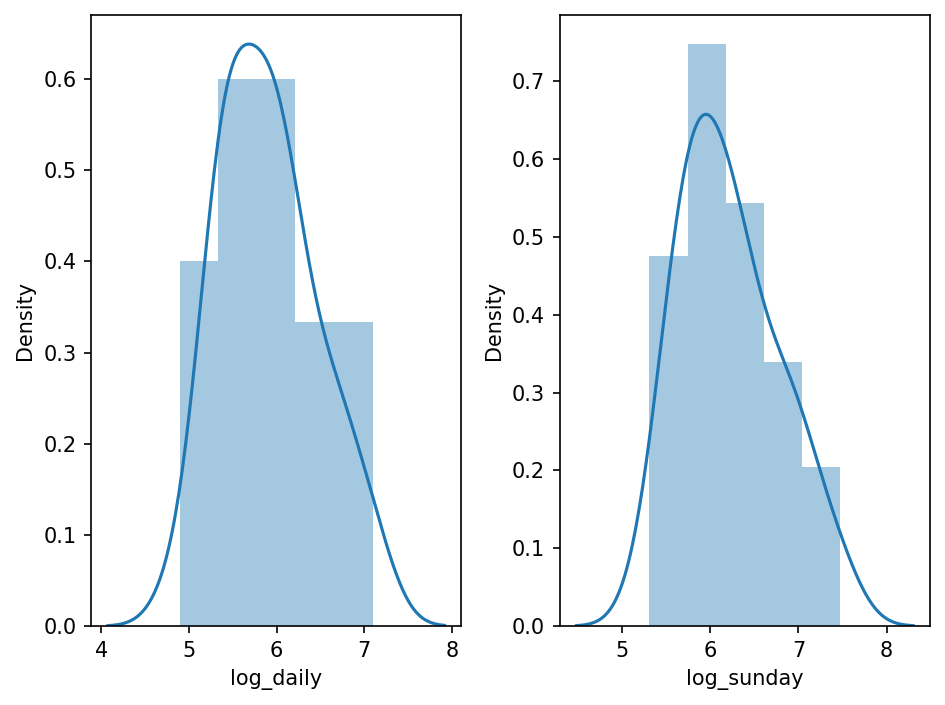

In [34]:
plt.subplot(1,2,1)
sns.distplot(df['log_daily'])

plt.subplot(1,2,2)
sns.distplot(df['log_sunday'])

plt.tight_layout()

In [35]:
df['log_daily'].skew(), df['log_sunday'].skew()

(0.4682202000020356, 0.5337572087816101)

# Sqrt transformation

In [36]:
df['sqrt_daily'] = np.sqrt(df['daily'])
df['sqrt_sunday'] = np.sqrt(df['sunday'])
df

,Newspaper,daily,sunday,log_daily,log_sunday,sqrt_daily,sqrt_sunday
0,Baltimore Sun,391.952,488.506,5.971139,6.191352,19.797778,22.102172
1,Boston Globe,516.981,798.298,6.248006,6.682482,22.737216,28.254168
2,Boston Herald,355.628,235.084,5.873885,5.459943,18.858102,15.332449
3,Charlotte Observer,238.555,299.451,5.474600,5.701951,15.445226,17.304653
4,Chicago Sun Times,537.780,559.093,6.287450,6.326316,23.190084,23.645147
5,Chicago Tribune,733.775,1133.249,6.598202,7.032844,27.088282,33.663764
6,Cincinnati Enquirer,198.832,348.744,5.292460,5.854338,14.100780,18.674689
7,Denver Post,252.624,417.779,5.531902,6.034953,15.894150,20.439643
8,Des Moines Register,206.204,344.522,5.328866,5.842158,14.359805,18.561304
9,Hartford Courant,231.177,323.084,5.443184,5.777912,15.204506,17.974538


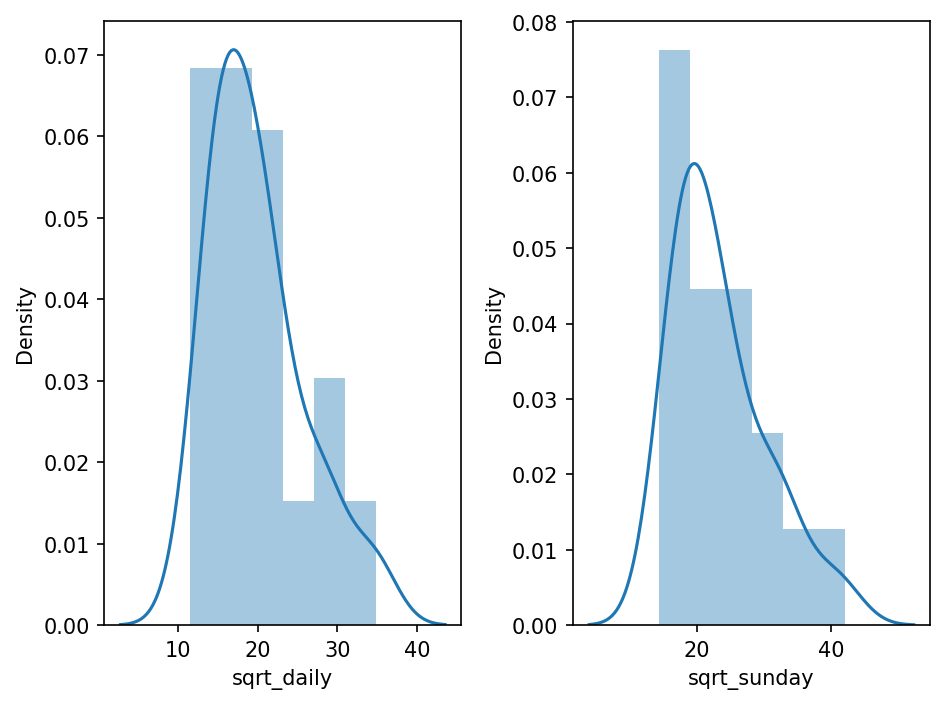

In [37]:
plt.subplot(1,2,1)
sns.distplot(df['sqrt_daily'])

plt.subplot(1,2,2)
sns.distplot(df['sqrt_sunday'])

plt.tight_layout()

In [38]:

df['sqrt_daily'].skew()

1.0075247084922163

In [39]:
df['sqrt_sunday'].skew()

1.0392935145699538